In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
recentDate = (session.query(Measurement.date)
                .order_by(Measurement.date.desc())
                .first())
# print(recentDate) <'2017-08-23>


('2017-08-23',)


In [53]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
yearbeforeDate = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#print(yearbeforeDate) <'2016-08-23>

# Perform a query to retrieve the data and precipitation scores
year_prcp = (session.query(Measurement.date, Measurement.prcp)
            .filter(func.strftime('%Y-%m-%d', Measurement.date) >= 
            yearbeforeDate).order_by(Measurement.date).all())
#max_prcp

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp = pd.DataFrame(year_prcp, columns=['date', 'prcp'])
prcp.set_index('date', inplace=True)
prcp.head(20)

# Sort the dataframe by date
prcp.sort_values('date')


,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


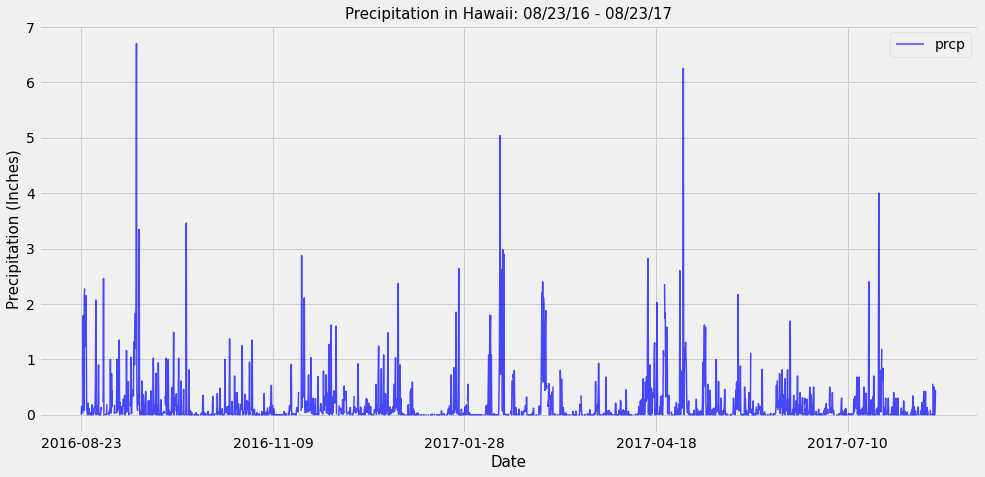

In [84]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp.plot(linewidth=1.5, alpha=0.7, color='blue', figsize=(15,7))
plt.xlabel("Date", fontsize=15)
plt.ylabel("Precipitation (Inches)", fontsize=15)
plt.title("Precipitation in Hawaii: 08/23/16 - 08/23/17", fontsize=15)
plt.show()



In [56]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [57]:
# Design a query to calculate the total number stations in the dataset
totalStations = session.query(Station).count()
print(f"Total Number of Stations: {totalStations}")

Total Number of Stations: 9


In [62]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activeStations = (session.query(Measurement.station, func.count(Measurement.station))
                    .group_by(Measurement.station)
                    .order_by(func.count(Measurement.station)
                    .desc())
                    .all())
activeStations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [69]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tobs_data = [Measurement.station,
            func.min(Measurement.tobs),
            func.max(Measurement.tobs),
            func.avg(Measurement.tobs)]
activeID = (session.query(*tobs_data)
            .filter(Measurement.station=='USC00519281')
            .all())
activeID
active_df = pd.DataFrame(activeID, columns=['station', 
            'min_temp', 'max_temp', 'avg_temp'])
active_df.set_index('station', inplace=True)
active_df

,min_temp,max_temp,avg_temp
station,,,
USC00519281,54.0,85.0,71.663781


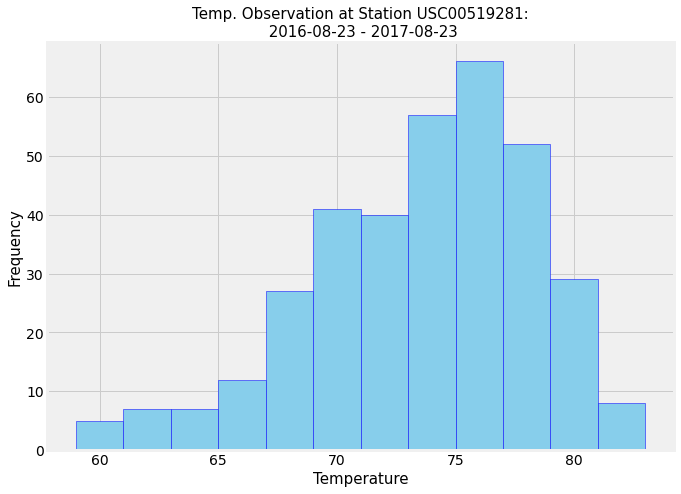

In [81]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_active = (session.query(Measurement.date, (Measurement.tobs))
                .filter(func.strftime(Measurement.date)
                > yearbeforeDate)
                .filter(Measurement.station=='USC00519281')
                .all())
#year_active
tobs = pd.DataFrame(year_active)
tobs.set_index('date', inplace=True)
#tobs

# Plot the histogram
plt.figure(figsize=(10,7), facecolor="white")
plt.hist(tobs['tobs'], bins=12, edgecolor="b", color="skyblue")
plt.title("Temp. Observation at Station USC00519281:\n 2016-08-23 - 2017-08-23", fontsize=15)
plt.xlabel("Temperature", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.show()


# Close session

In [85]:
# Close Session
session.close()